<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
#df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df = pd.read_csv("anscombe.csv")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# Pregunta 1

<AxesSubplot:xlabel='x', ylabel='y'>

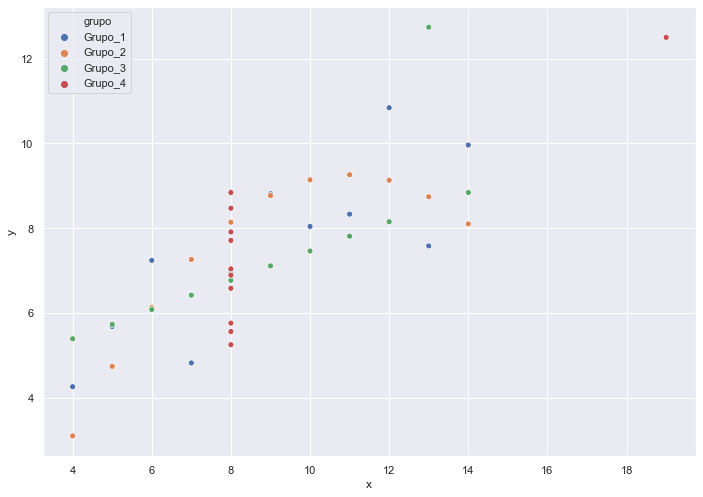

In [5]:
#Realizamos un grafico de tipo scatter 

sns.scatterplot(
    x = "x",
    y = "y",
    hue = "grupo",
    data = df
)

Hay ciertos grupos que no se puede distinguir si son diferentes, por ejemplo el grupo 1,2 y 3 no se distingue si son diferentes pero el grupo 4 si es difernte al resto

# Pregunta 2

In [7]:
df.groupby(["grupo"]).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

Podemos notar que ciertos estadisticos son los mismos, por ejemplo la media y desviacion estandar. Los grupos no se pueden distinguir entre si por los valores de sus estadísticos y el grupo 4 que es visualmente diferente al resto posee estadisticas muy simmilares a los grupos 1,2 y 3

# Pregunta 3

El mejor ajuste lineal viene dado por la recta: 

f(x) = 3.57 + 0.39*y


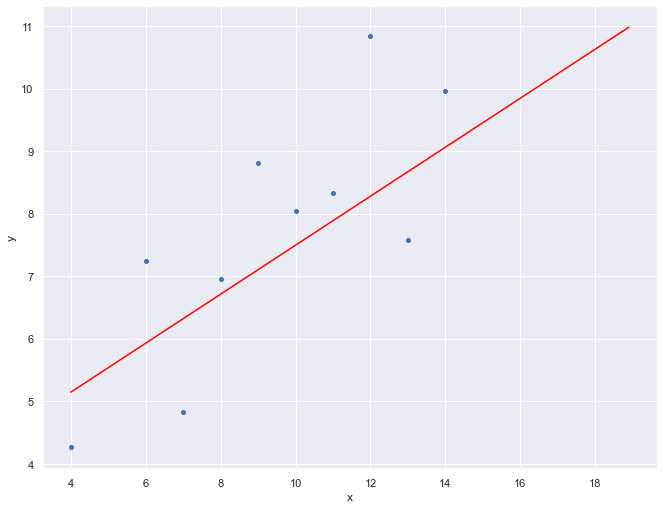

El mejor ajuste lineal viene dado por la recta: 

f(x) = 2.1 + 0.61*y


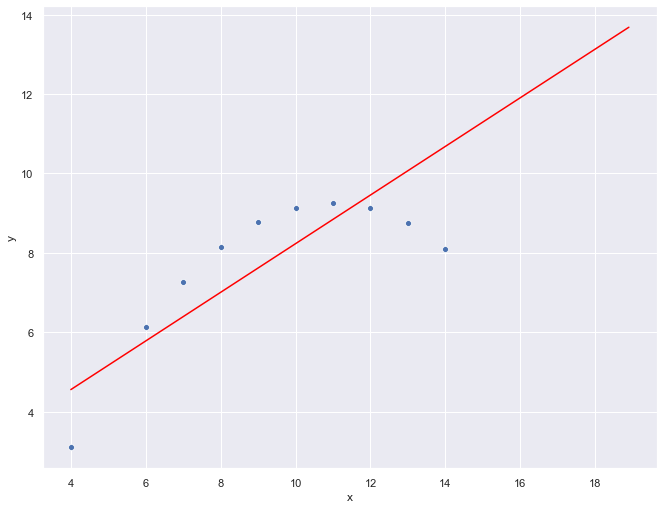

El mejor ajuste lineal viene dado por la recta: 

f(x) = 1.73 + 0.7*y


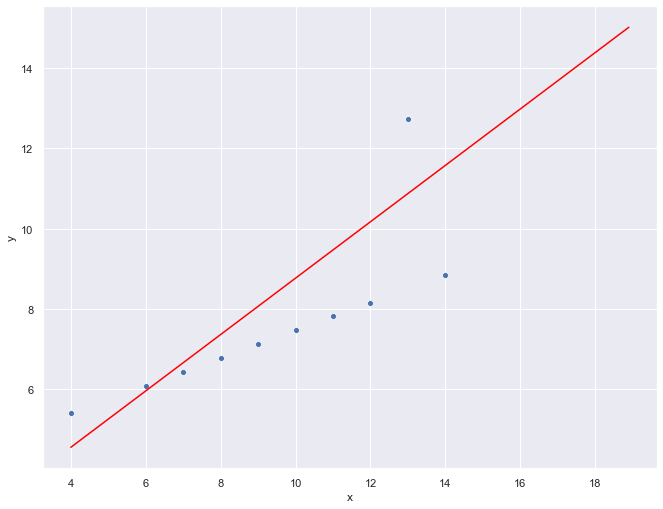

El mejor ajuste lineal viene dado por la recta: 

f(x) = 4.1 + 0.44*y


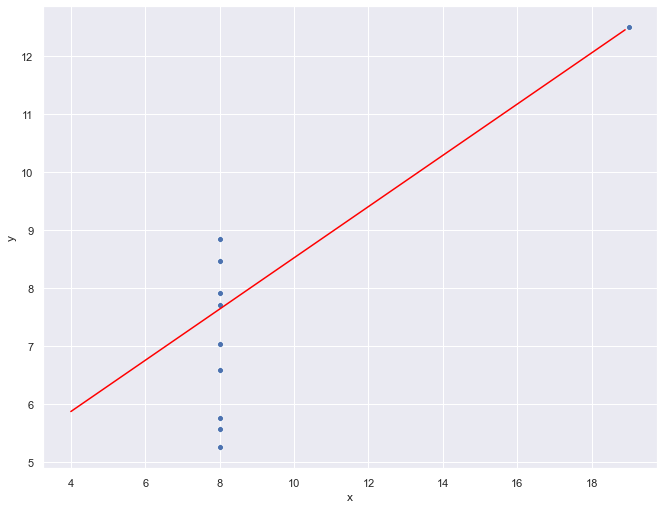

In [80]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model_rl = LinearRegression() # Creando el modelo.

grupo_1 = df[:10]
grupo_2 = df[11:21]
grupo_3 = df[22:32]
grupo_4 = df[33:43]

def regresion_por_grupo(data,model):
    X = data[["x"]]
    y = data["y"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    model.fit(X_train,y_train)
    
    beta_0 = round(model_rl.intercept_,2)
    beta_1 = round(model_rl.coef_[0],2)

    print(f"El mejor ajuste lineal viene dado por la recta: \n\nf(x) = {beta_0} + {beta_1}*y")
    
    #Y_predict = model_rl.predict(X_test)
    
    beta_0 = model_rl.intercept_
    beta_1 = model_rl.coef_[0]
    
    x_range = np.arange(4,19,0.1)
        
    df_plot = pd.DataFrame({'x':x_range,
                            'y_true':[beta_0 + beta_1*n for n in x_range]})

    df = pd.DataFrame({'x':X['x'],
                               'y_true':y})

    fig, ax = plt.subplots(figsize=(11, 8.5))


    sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
    sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        })
    return df_temp,y_test,X_test,X_train,y_train,X,y

df_grupo_1 = regresion_por_grupo(grupo_1,model_rl)
df_grupo_2 = regresion_por_grupo(grupo_2,model_rl)
df_grupo_3 = regresion_por_grupo(grupo_3,model_rl)
df_grupo_4 = regresion_por_grupo(grupo_4,model_rl)


Podemos notar que al realizar un ajuste lineal a cada grupo, hay algunos que se salen del supuesto de linealidad por lo que el ajuste no es correcto, por ejemplo el grupo 2 y 4. Ante esto podemos notar que no todos los grupos se pueden predecir mediante una regresión lineal

# Pregunta 4

In [69]:
from metrics_regression import *
from sklearn.metrics import r2_score

datos = [df_grupo_1,df_grupo_2,df_grupo_3,df_grupo_4]
for data in datos:
    df_metrics = summary_metrics(data[0])
    df_metrics['r2'] =  round(r2_score(data[1], model_rl.predict(data[2])),4)
    print('\nMetricas:')
    print(df_metrics)


Metricas:
      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  1.0627  1.9344  1.3908  0.1074  0.1062  0.1188  0.0973  0.1171  0.6954

Metricas:
      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  1.2382  2.2224  1.4908  0.1484  0.1455  0.1435  0.1325  0.1411 -4.3396

Metricas:
      mae     mse    rmse    mape   maape  wmape   mmape   smape      r2
0  1.6622  3.4047  1.8452  0.2048  0.2007  0.213  0.1822  0.1831 -1.3308

Metricas:
     mae     mse    rmse    mape   maape   wmape   mmape   smape     r2
0  1.401  2.3249  1.5248  0.2361  0.2289  0.2247  0.2019  0.2061 -5.421


podemos notar que para el grupo 1 se tienen buenos resultados usando una regresión lineal mientras que en los demas el comportamiento no presenta linealidad debido a que su coeficiente $r^2$ es negativo y esto nos indica que el ajuste realizado no es correcto, en particular para el grupo 4 tenemos un $r^2$ grande en comparación al resto y esto es porque los datos no presentan comportamiento ni siquiera como función

# Pregunta 5

Para el grupo 1 podriamos eliminar outliers, para esto existen técnicas de detección como por ejemplo las contenidas en este articulo https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/ que son Isolation Forest, Minimum Covariance Determinant , Local Outlier Factor, One-Class SVM. 

Para el grupo 2 existe un instante de no linealidad en los datos, ante esto se puede realizar una modificación en el método mediante SVM que si considera no linealidad en los datos

Para el grupo 3 se puede eliminar un outlier que inclina la recta que se ubica en (13,13) aproximadamente, esto haria que la recta se incline hacia abajo y se ajuste mejor a los datos

Para el grupo 4 visualmente se puede determinar que x=8 es una recta que ajusta de buena forma